# Pre-owned car price prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

## Loading and data cleaning

In [3]:
df= pd.read_csv("Final_dataset.csv")
df.head()

Car_name  Km_driven  Selling_price  Model Gear_box Fuel_type  \
0  MarutiCelerio      42000         675000   2016   Manual    Petrol   
1    ToyotaHilix      62000         900000   2013   Manual    Diesel   
2         AltoLX      95000         270000   2010   Manual    Petrol   
3        Wagoner      60000         300000   2008   Manual    Petrol   
4         Camper      80000         717000   2019   Manual    Petrol   

  Drive_type  Color Air_con Location  
0      Right  White     Yes  Thimphu  
1      Right   Blue     Yes  Thimphu  
2      Right  Black     Yes  Thimphu  
3      Right  Black     Yes  Thimphu  
4      Right  Black     Yes  Thimphu

In [4]:
df.shape

(1400, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_name       1400 non-null   object
 1   Km_driven      1400 non-null   int64 
 2   Selling_price  1400 non-null   int64 
 3   Model          1400 non-null   int64 
 4   Gear_box       1400 non-null   object
 5   Fuel_type      1400 non-null   object
 6   Drive_type     1400 non-null   object
 7   Color          1400 non-null   object
 8   Air_con        1400 non-null   object
 9   Location       1400 non-null   object
dtypes: int64(3), object(7)
memory usage: 109.5+ KB


In [6]:
df.isnull().sum()

Car_name         0
Km_driven        0
Selling_price    0
Model            0
Gear_box         0
Fuel_type        0
Drive_type       0
Color            0
Air_con          0
Location         0
dtype: int64

In [7]:
print(df.Fuel_type.value_counts())
print(df.Gear_box.value_counts()) 


Diesel    698
Petrol    688
CNG         8
LPG         6
Name: Fuel_type, dtype: int64
Manual       1210
Automatic     190
Name: Gear_box, dtype: int64


In [8]:
df.Gear_box.unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
df.Fuel_type.unique()

array(['Petrol', 'Diesel', 'LPG', 'CNG'], dtype=object)

In [10]:
df.Model.unique()

array([2016, 2013, 2010, 2008, 2019, 2015, 2017, 2021, 2005, 2011, 2014,
       2009, 2003, 2018, 2007, 2012, 2020, 2006, 2002, 2000, 1999, 2004,
       2001, 1996], dtype=int64)

## Data Analysis

In [11]:
df1 = df.drop(['Drive_type' ],axis=1).reindex(['Car_name','Model','Gear_box', 'Fuel_type','Km_driven', 'Selling_price'],axis=1)
df1.head()

Car_name  Model Gear_box Fuel_type  Km_driven  Selling_price
0  MarutiCelerio   2016   Manual    Petrol      42000         675000
1    ToyotaHilix   2013   Manual    Diesel      62000         900000
2         AltoLX   2010   Manual    Petrol      95000         270000
3        Wagoner   2008   Manual    Petrol      60000         300000
4         Camper   2019   Manual    Petrol      80000         717000

In [12]:
df1.isnull().sum()

Car_name         0
Model            0
Gear_box         0
Fuel_type        0
Km_driven        0
Selling_price    0
dtype: int64

Text(0.5, 1.0, 'Model vs Selling Price')

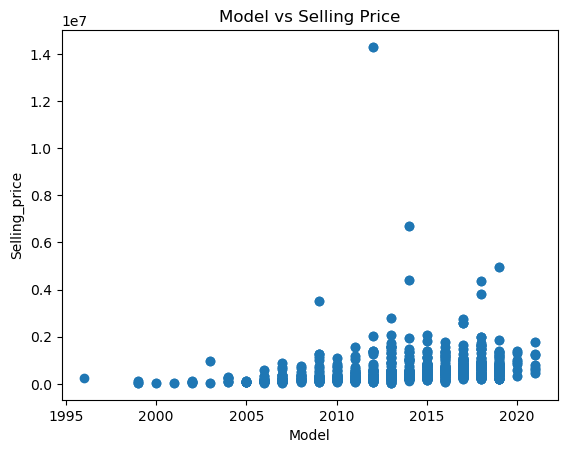

In [13]:
plt.scatter(x=df["Model"], y=df["Selling_price"])
plt.xlabel("Model")
plt.ylabel("Selling_price")
plt.title("Model vs Selling Price")

Text(0.5, 1.0, 'Kilometer Driven vs Selling Price')

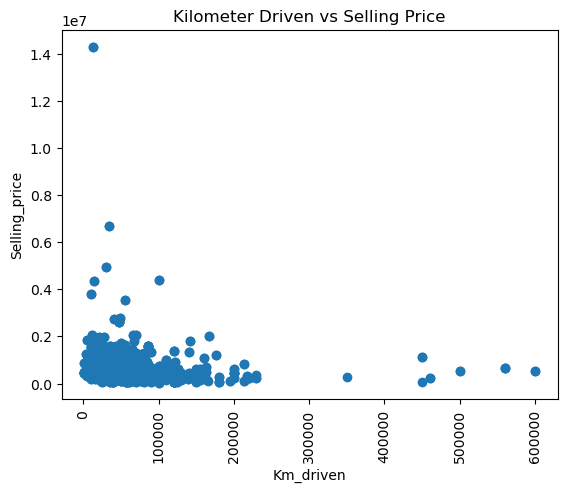

In [14]:
plt.scatter(x=df["Km_driven"], y=df["Selling_price"])
plt.xlabel("Km_driven")
plt.xticks(rotation=90)
plt.ylabel("Selling_price")
plt.title("Kilometer Driven vs Selling Price")

Text(0.5, 1.0, 'Fuel Type vs Selling Price')

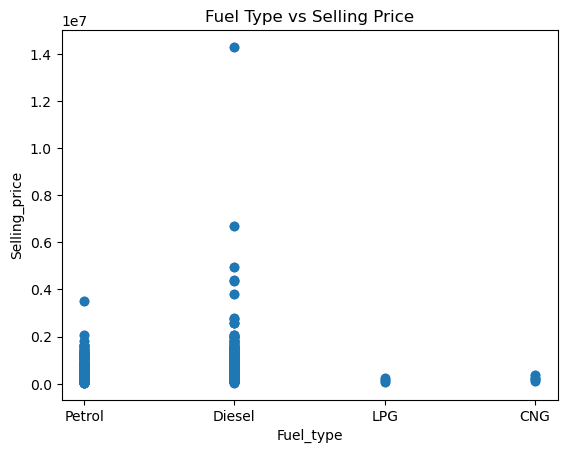

In [15]:
plt.scatter(x=df["Fuel_type"], y=df["Selling_price"])
plt.xlabel("Fuel_type")
plt.ylabel("Selling_price")
plt.title("Fuel Type vs Selling Price")

Text(0.5, 1.0, 'Gear Type vs Selling Price')

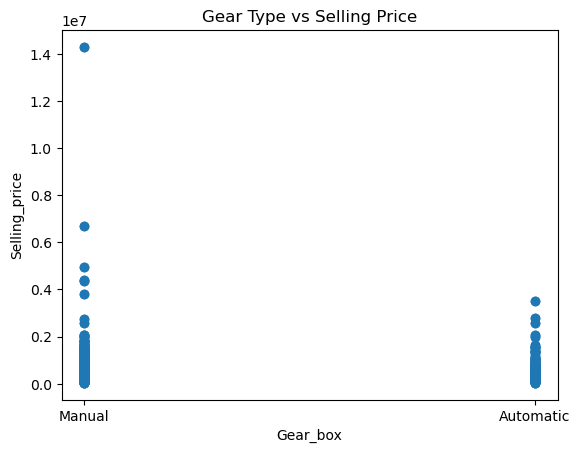

In [16]:
plt.scatter(x=df["Gear_box"], y=df["Selling_price"])
plt.xlabel("Gear_box")
plt.ylabel("Selling_price")
plt.title("Gear Type vs Selling Price")

## Manual & Automatic

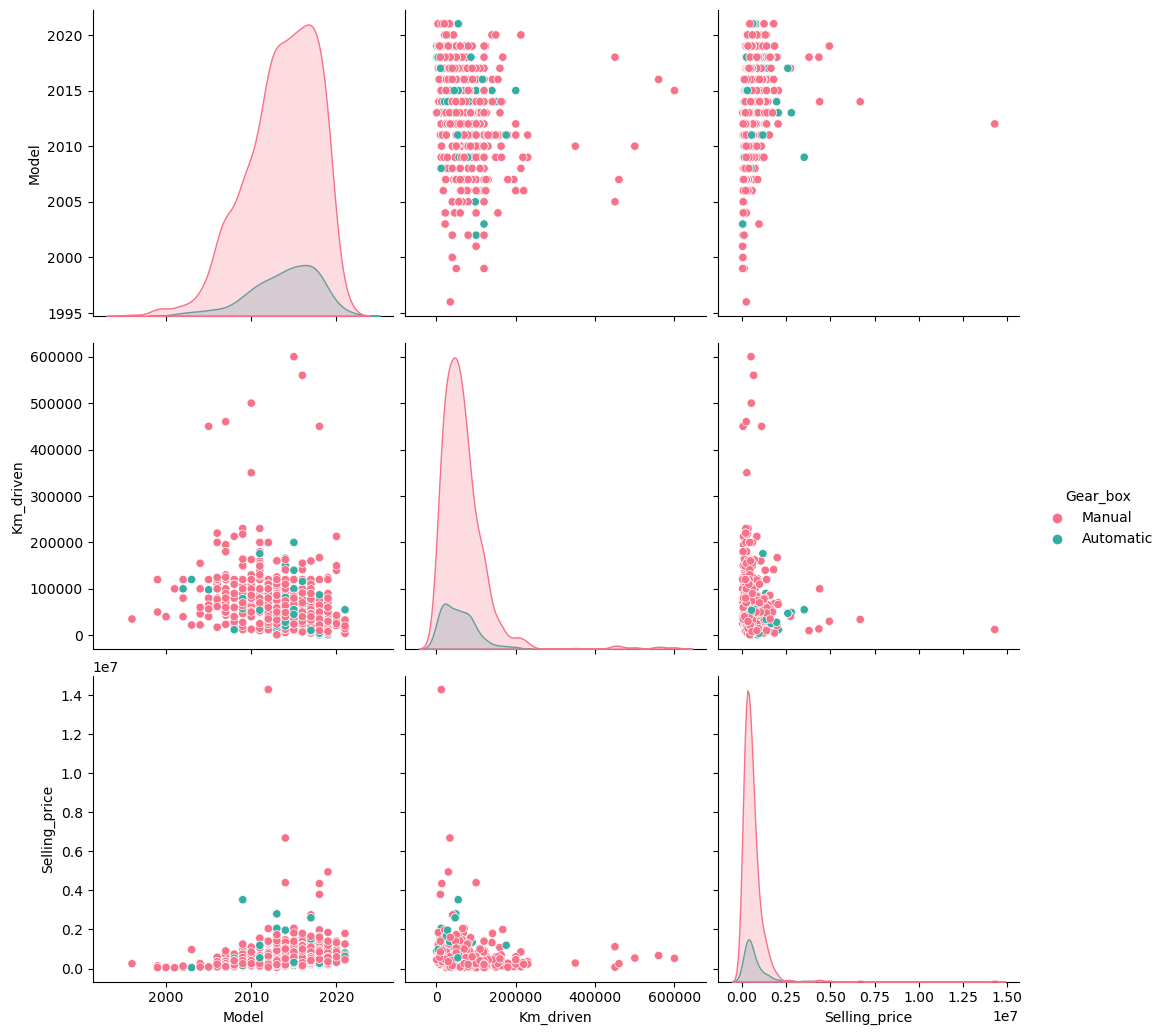

In [17]:
sns.pairplot(df1,hue = 'Gear_box',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()


Automatic cars and manual second hand car have almost same price.There is little increase of automatic cars from 2010.



## Fuel type

In [18]:
df1.Fuel_type.value_counts()

Diesel    698
Petrol    688
CNG         8
LPG         6
Name: Fuel_type, dtype: int64

In [19]:
 df2 = df1
df2.Fuel_type = df2.Fuel_type.map(lambda x: x if x in ['Diesel','Petrol'] else 'Others')
df2.Fuel_type.unique()

array(['Petrol', 'Diesel', 'Others'], dtype=object)

In [20]:
manual = df2[df2['Gear_box']=='Manual']
automatic = df2[df2['Gear_box']=='Automatic']

Manual type car


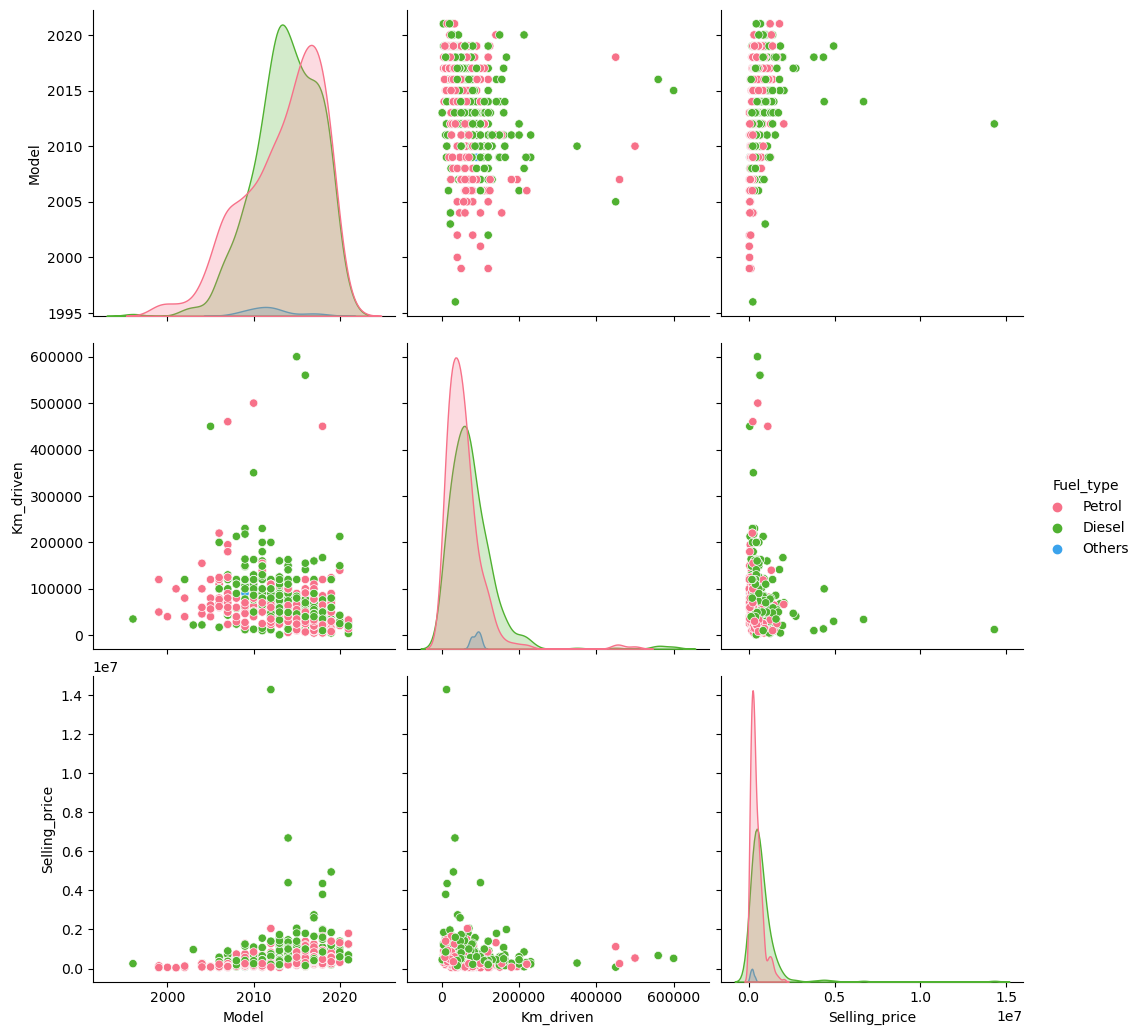

In [21]:
print('Manual type car')
sns.pairplot(manual,hue = 'Fuel_type',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

Automatic type car


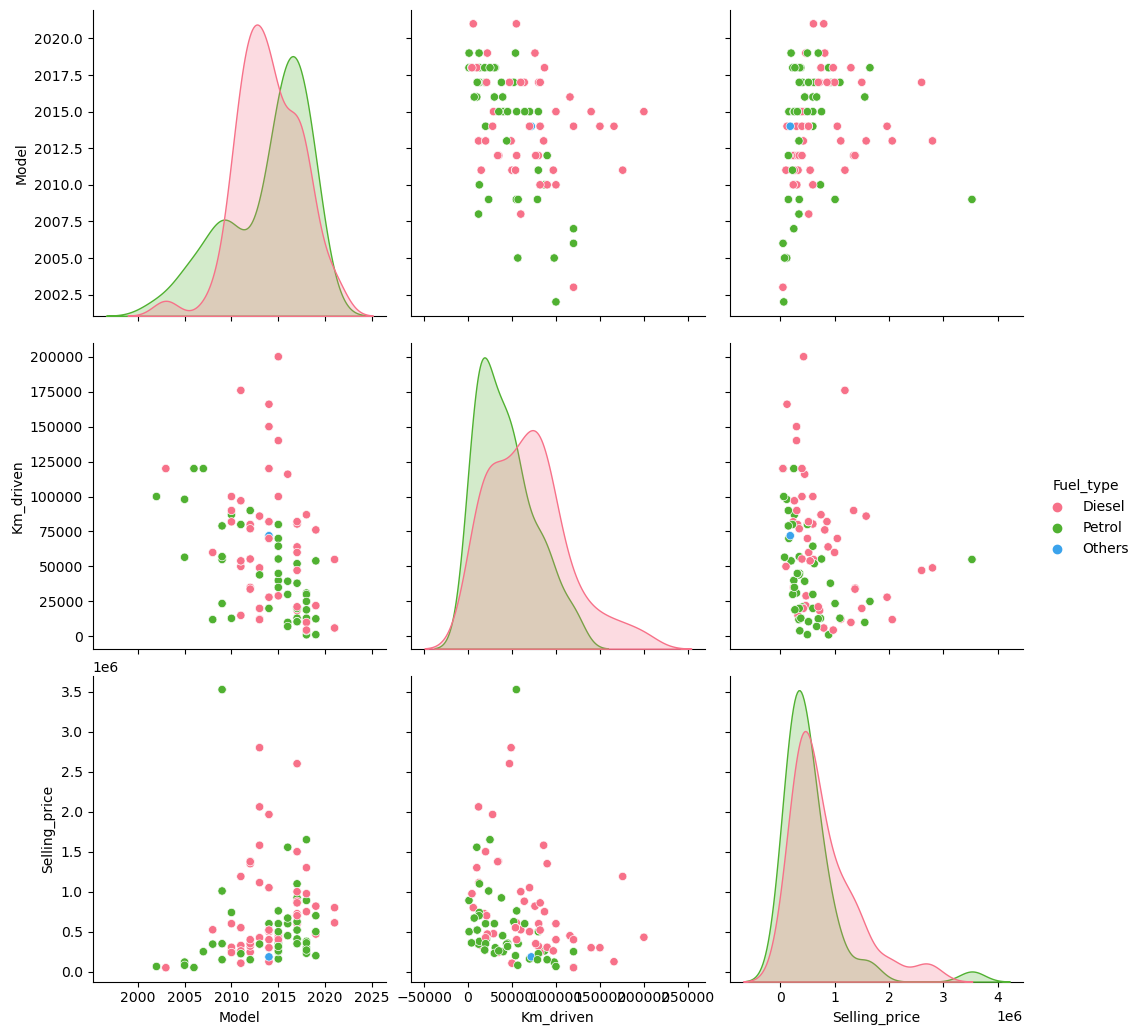

In [22]:
print('Automatic type car')
sns.pairplot(automatic,hue = 'Fuel_type',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

# Outlier Detection

In [23]:
df2.groupby('Gear_box').agg(['mean','std','min','max']).applymap(lambda x: format(x,'.0f')).drop(['Model'],axis=1)

Km_driven                      Selling_price                 \
               mean    std   min     max          mean     std    min   
Gear_box                                                                
Automatic     56219  40960  1136  200000        673944  602578  50000   
Manual        67137  62124  1000  600000        598969  797663  43000   

                     
                max  
Gear_box             
Automatic   3525995  
Manual     14295679

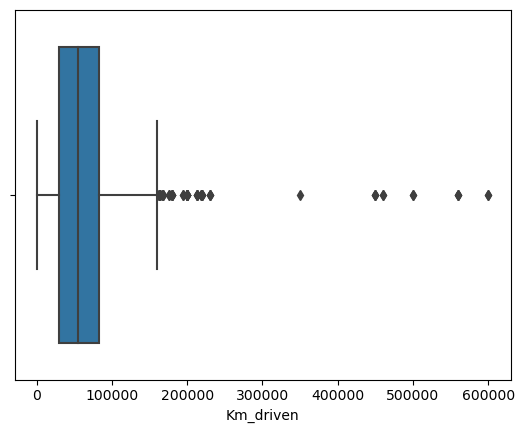

In [24]:
sns.boxplot(x=df2['Km_driven'])
plt.show()

In [25]:
def remove_outlier_km_driven(df):
    temp = pd.DataFrame()
    df_km_driven = df['Km_driven']

    Q1 = df_km_driven.quantile(0.25)
    Q3 = df_km_driven.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_km_driven[(df_km_driven < (Q1 - 1.5 * IQR)) | (df_km_driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return df.drop(temp.index)

df3 = remove_outlier_km_driven(df2)

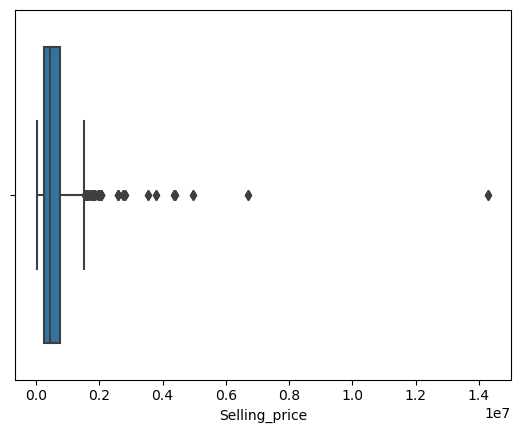

In [26]:
 sns.boxplot(x = df3['Selling_price'])
plt.show()

In [27]:
def remove_outlier_selling_price(df):
    temp = pd.DataFrame()
    for year in sorted(df.Model.unique()):
        year_price_manual = df[(df['Model']==year) & (df['Gear_box']=='Manual')]['Selling_price']
        manual_Q1 = year_price_manual.quantile(0.25)
        manual_Q3 = year_price_manual.quantile(0.75)
        manual_IQR = manual_Q3 - manual_Q1
        outlier_manual = year_price_manual[(year_price_manual < (manual_Q1 - 1.5 * manual_IQR)) | (year_price_manual > (manual_Q3 + 1.5 * manual_IQR))]
        temp = pd.concat([temp,outlier_manual])
        
        year_price_automatic = df[(df['Model']==year) & (df['Gear_box']=='Automatic')]['Selling_price']
        automatic_Q1 = year_price_automatic.quantile(0.25)
        automatic_Q3 = year_price_automatic.quantile(0.75)
        automatic_IQR = automatic_Q3 - automatic_Q1
        outlier_automatic = year_price_automatic[(year_price_automatic < (automatic_Q1 - 1.5 * automatic_IQR)) | (year_price_automatic > (automatic_Q3 + 1.5 * automatic_IQR))]
        temp = pd.concat([temp,outlier_automatic])
    return df.drop(temp.index)

df4 = remove_outlier_selling_price(df3)

In [28]:
year_mean_manual = df4[df4['Gear_box']=='Manual'].groupby('Model')['Selling_price'].mean()
year_mean_automatic = df4[df4['Gear_box']=='Automatic'].groupby('Model')['Selling_price'].mean()

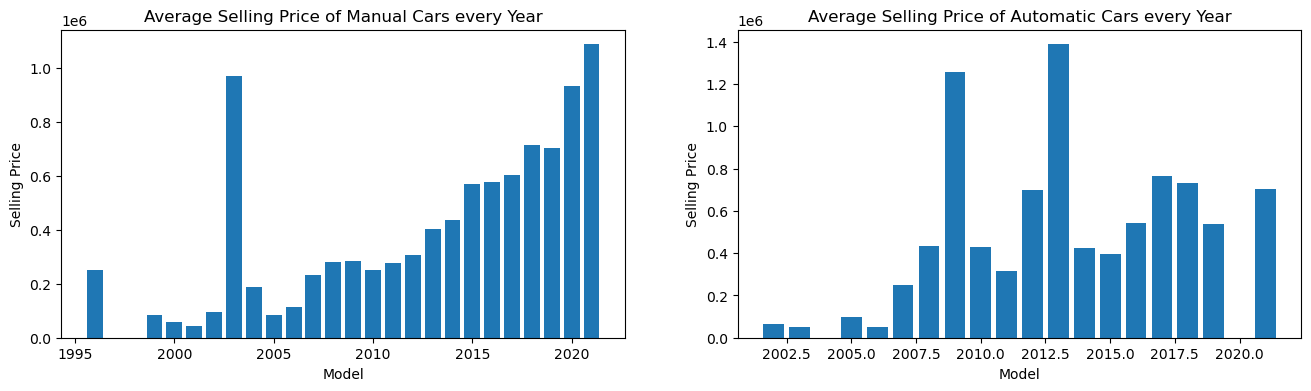

In [29]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Selling Price')

plt.show()

In [30]:
df5 = df4[df4['Model']>2005]

In [31]:
year_mean_manual_price = df5[df5['Gear_box']=='Manual'].groupby('Model')['Selling_price'].mean()
year_mean_automatic_price = df5[df5['Gear_box']=='Automatic'].groupby('Model')['Selling_price'].mean()
year_mean_manual_km = df5[df5['Gear_box']=='Manual'].groupby('Model')['Km_driven'].mean()
year_mean_automatic_km = df5[df5['Gear_box']=='Automatic'].groupby('Model')['Km_driven'].mean()

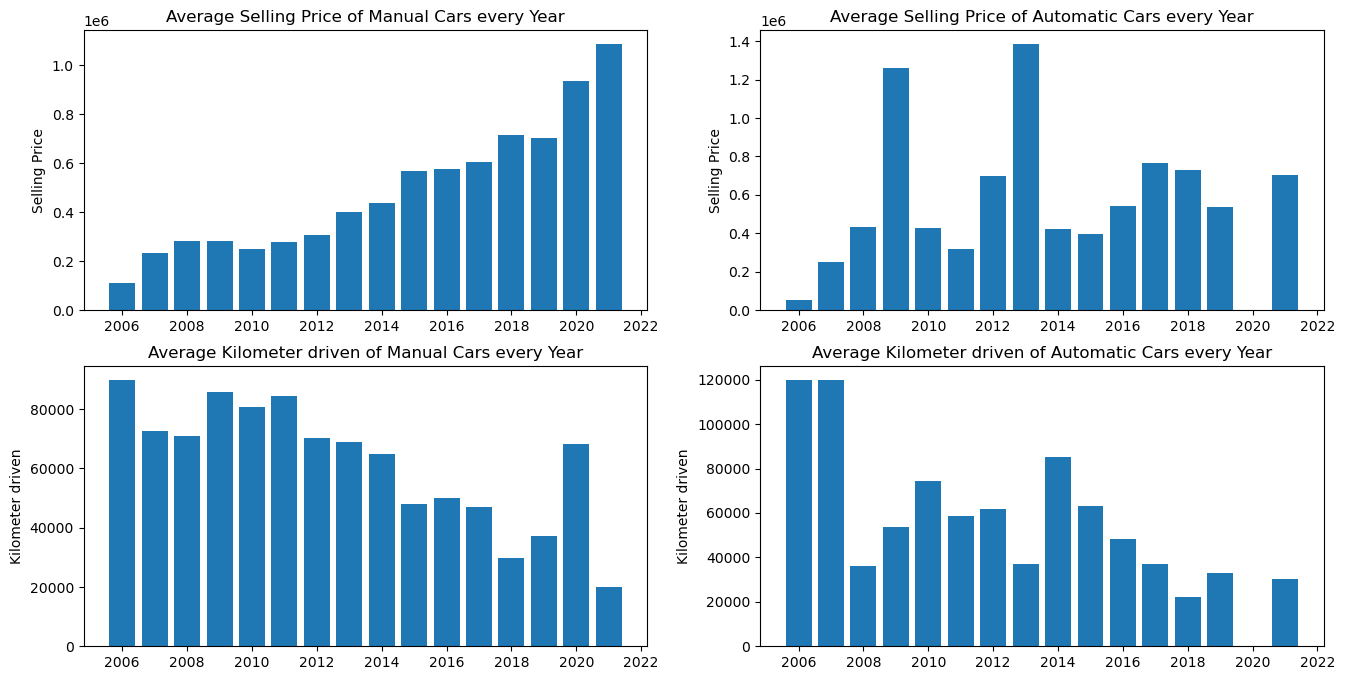

In [32]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,8))

ax[0][0].bar(year_mean_manual_price.index,year_mean_manual_price)
ax[0][1].bar(year_mean_automatic_price.index,year_mean_automatic_price)

ax[1][0].bar(year_mean_manual_km.index,year_mean_manual_km)
ax[1][1].bar(year_mean_automatic_km.index,year_mean_automatic_km)

ax[0][0].set_title('Average Selling Price of Manual Cars every Year')
ax[0][0].set_ylabel('Selling Price')

ax[0][1].set_title('Average Selling Price of Automatic Cars every Year')
ax[0][1].set_ylabel('Selling Price')

ax[1][0].set_title('Average Kilometer driven of Manual Cars every Year')
ax[1][0].set_ylabel('Kilometer driven')

ax[1][1].set_title('Average Kilometer driven of Automatic Cars every Year')
ax[1][1].set_ylabel('Kilometer driven')

plt.show()

In [33]:
def remove_outlier_last_year(df):
    temp = pd.DataFrame()
    model = sorted(df.Model.unique())
    for i in range(1,len(model)):
        df_year = df[(df['Model']==model[i])&(df['Gear_box']=='Manual')]
        last_mean_km_driven = df[(df['Model']==model[i-1])&(df['Gear_box']=='Manual')]['Km_driven'].mean()
        last_mean_selling_price = df[(df['Model']==model[i-1])&(df['Gear_box']=='Manual')]['Selling_price'].mean() 
        df_outlier = df_year[(df_year['Km_driven']>last_mean_km_driven)&(df_year['Selling_price']<last_mean_selling_price)]
        temp = pd.concat([temp,df_outlier])
        
        df_year = df[(df['Model']==model[i])&(df['Gear_box']=='Automatic')]
        last_mean_km_driven = df[(df['Model']==model[i-1])&(df['Gear_box']=='Automatic')]['Km_driven'].mean()
        last_mean_selling_price = df[(df['Model']==model[i-1])&(df['Gear_box']=='Automatic')]['Selling_price'].mean() 
        df_outlier = df_year[(df_year['Km_driven']>last_mean_km_driven)&(df_year['Selling_price']<last_mean_selling_price)]
        temp = pd.concat([temp,df_outlier]) 
    return df.drop(temp.index)
    
df6 = remove_outlier_last_year(df5)

In [34]:
def remove_outlier_last_year(df):
    temp = pd.DataFrame()
    for i in sorted(df.Model.unique()):
        df_year = df[df['Model']==i]
        km = df_year['Km_driven']
        price = df_year['Selling_price']
        outlier = df_year[(df_year['Km_driven']<km.mean()-km.std())&(df_year['Selling_price']<price.mean()-price.std()) | (df_year['Km_driven']>km.mean()+km.std())&(df_year['Selling_price']>price.mean()+price.std())]
        temp = pd.concat([temp,outlier])

    return df.drop(temp.index)
    
df7 = remove_outlier_last_year(df6)

In [35]:
df7.shape

(957, 6)

In [36]:
df7.head()

Car_name  Model Gear_box Fuel_type  Km_driven  Selling_price
0   MarutiCelerio   2016   Manual    Petrol      42000         675000
1     ToyotaHilix   2013   Manual    Diesel      62000         900000
3         Wagoner   2008   Manual    Petrol      60000         300000
4          Camper   2019   Manual    Petrol      80000         717000
6  MahindraBolero   2017   Manual    Diesel     120000         628000

In [37]:
X = df7.iloc[:, :5]
y = df7.iloc[:, -1]

In [38]:
print (X)

            Car_name  Model   Gear_box Fuel_type  Km_driven
0      MarutiCelerio   2016     Manual    Petrol      42000
1        ToyotaHilix   2013     Manual    Diesel      62000
3            Wagoner   2008     Manual    Petrol      60000
4             Camper   2019     Manual    Petrol      80000
6     MahindraBolero   2017     Manual    Diesel     120000
...              ...    ...        ...       ...        ...
1392       HondaBrio   2018     Manual    Petrol      22000
1395       TataTiago   2019     Manual    Petrol       8000
1396      MarutiRitz   2016     Manual    Diesel      40000
1397    MarutiVitara   2018     Manual    Diesel      10000
1399   FordEndeavour   2011  Automatic    Diesel      54000

[957 rows x 5 columns]


# Train test split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5, shuffle=True)

# Creating Pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [41]:
numeric_cols = X.select_dtypes(include=['int64']).columns
print(numeric_cols)

Index(['Model', 'Km_driven'], dtype='object')


In [42]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Car_name', 'Gear_box', 'Fuel_type'], dtype='object')


In [43]:
n_index = [X.columns.get_loc(col) for col in numeric_cols]
n_index

[1, 4]

In [44]:
c_index = [X.columns.get_loc(col) for col in categorical_cols]
c_index

[0, 2, 3]

In [45]:
numeric_transformer = Pipeline(steps = [
    ('imputerN',SimpleImputer(strategy='median')), 
    ('scaler',StandardScaler())
] )

categorical_transformer = Pipeline(steps = [
    ('imputerC', SimpleImputer(strategy='most_frequent')),
    ('oneHot', OneHotEncoder(handle_unknown='ignore'))
])

In [46]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers = [
                ('num',numeric_transformer,n_index),
                ('cat',categorical_transformer,c_index)
]) 

# Decision TreeRegressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(max_depth=12)

In [48]:
pipelinemodeldr = Pipeline(
    steps = [
      ('preprocessor', preprocessor), 
      ('est', model2)  
    ]
)

In [49]:
from sklearn import set_config
set_config(display='diagram')

pipelinemodeldr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [1, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 2, 3])])),
                ('est', DecisionTreeRegressor(max_depth=12))])

In [50]:
 pipelinemodeldr.score(X_train,y_train)

0.874417268865797

In [51]:
pipelinemodeldr.score(X_test,y_test)

0.6854113044891273

In [52]:
y_pred = pipelinemodeldr.predict(X_test)

In [53]:
X_test

Car_name  Model   Gear_box Fuel_type  Km_driven
779        VigoHilux   2011     Manual    Petrol      20000
1302        KiaSONET   2021     Manual    Petrol      32892
431   VolkswagenPolo   2015     Manual    Diesel      30000
1369        Hyundaii   2017     Manual    Petrol      33100
1173    HondaMobilio   2014     Manual    Diesel      44000
...              ...    ...        ...       ...        ...
971      MarutiSwift   2012     Manual    Petrol      49000
175       HyundaiEON   2009  Automatic    Petrol      55000
727     HyundaiXcent   2016     Manual    Petrol      53000
1395       TataTiago   2019     Manual    Petrol       8000
744       HyundaiEON   2015     Manual    Petrol      37000

[240 rows x 5 columns]

In [54]:
y_test

779      700000
1302    1256098
431      500000
1369     595000
1173     600000
         ...   
971      395000
175     3525995
727      600000
1395     575000
744      478800
Name: Selling_price, Length: 240, dtype: int64

In [55]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)
print("r2: {}".format(lin_r2))

r2: 0.6854113044891273


In [56]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_mse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))

mse: 211408.77196573454


# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

model3 = LinearRegression() 

In [58]:
pipelinemodell = Pipeline(
    steps = [
      ('preprocessor', preprocessor),
      ('est', model3) 
    ]
) 

In [59]:
  from sklearn import set_config
set_config(display='diagram')

pipelinemodell.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [1, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 2, 3])])),
                ('est', LinearRegression())])

In [60]:
pipelinemodell.score(X_train,y_train)

0.728893822435907

In [61]:
pipelinemodell.score(X_test,y_test)

0.4448612544046795

In [62]:
y_pred = pipelinemodell.predict(X_test)

In [63]:
from sklearn.metrics import r2_score,mean_squared_error
lin_r2 = r2_score(y_test, y_pred)
lin_mse = mean_squared_error(y_pred, y_test)
lin_mse = np.sqrt(lin_mse)
print("r2: {}".format(lin_r2))
print("mse: {}".format(lin_mse))

r2: 0.4448612544046795
mse: 280835.6368483658


# SVR


In [64]:
model = svm.SVR(kernel='rbf',C=10000000,gamma='scale')

In [65]:
pipelinemodel = Pipeline(
    steps = [
      ('preprocessor', preprocessor), 
      ('est', model)  
    ]
)

In [66]:
 type(X_train)

pandas.core.frame.DataFrame

In [67]:
from sklearn import set_config
set_config(display='diagram')

pipelinemodel.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [1, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 2, 3])])),
                ('est', SVR(C=10000000))])

In [68]:
pipelinemodel.score(X_train,y_train)

0.9679641937663422

In [69]:
 pipelinemodel.score(X_test,y_test) 

0.8366204837100593

In [70]:
y_pred = pipelinemodel.predict(X_test)

In [71]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)
print("r2: {}".format(lin_r2))

r2: 0.8366204837100593


In [72]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_mse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))

mse: 152352.73331596775


# K-Nearest Neighbor

In [73]:
from sklearn.neighbors import KNeighborsRegressor
model4 = KNeighborsRegressor()

In [80]:
pipelinemodelknn = Pipeline(
    steps = [
      ('preprocessor', preprocessor), 
      ('est', model4)  
    ]
)

In [82]:
from sklearn import set_config
set_config(display='diagram')

pipelinemodelknn.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [1, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 2, 3])])),
                ('est', KNeighborsRegressor())])

In [83]:
pipelinemodelknn.score(X_train, y_train)

0.6429870101131777

In [84]:
pipelinemodelknn.score(X_test, y_test)

0.5198289339544747

In [86]:
y_pred = pipelinemodelknn.predict(X_test)

In [87]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)
print("r2: {}".format(lin_r2))

r2: 0.5198289339544747


In [88]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_mse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))

mse: 261185.72718627958


# Saving Model

In [75]:
import pickle
pickle.dump(pipelinemodeldr, open("pre_car_price_model.pickle", "wb"))

In [76]:
model = pickle.load(open("pre_car_price_model.pickle","rb"))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [1, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputerC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 2, 3])])),
                ('est', DecisionTreeRegressor(max_depth=12))])

In [77]:
 model.predict(X_test)

array([ 200000.        , 1256098.        ,  350370.        ,
        460517.65      ,  494624.08196721,  494624.08196721,
        494624.08196721,  494624.08196721, 1600000.        ,
        327500.        ,  460517.65      ,  574823.52941176,
        565000.        ,  255699.68539326,  494624.08196721,
        494624.08196721,  255699.68539326,  350000.        ,
       1263872.        , 2800000.        ,  346400.        ,
        346400.        ,  151142.85714286,  460517.65      ,
        406666.66666667,  494624.08196721,  650000.        ,
        574823.52941176,  494624.08196721, 1600000.        ,
        574823.52941176,  460517.65      ,  494624.08196721,
        494624.08196721,  774624.30555556,  346400.        ,
        255699.68539326,  346400.        ,  350370.        ,
        346400.        ,  255699.68539326,  774624.30555556,
        346400.        ,  255699.68539326,  460517.65      ,
        255699.68539326,  350370.        ,  255699.68539326,
        494624.08196721,

In [78]:
X_train

Car_name  Model   Gear_box Fuel_type  Km_driven
1325      TataIndigo   2014     Manual    Petrol      60000
736   MahindraBolero   2018     Manual    Petrol      12400
1052     MahindraXUV   2012     Manual    Diesel      80000
191   MahindraBolera   2011     Manual    Diesel      15170
862    HyundaiAccent   2009     Manual    Petrol      64350
...              ...    ...        ...       ...        ...
582     MarutiErtiga   2015     Manual    Petrol      11918
170            AudiA   2013  Automatic    Diesel      49000
1015     MarutiSwift   2008     Manual    Diesel     120000
295    RenaultDuster   2015     Manual    Diesel      15000
1266    HyundaiGrand   2017  Automatic    Petrol      10510

[717 rows x 5 columns]

In [79]:
 y_train

1325     240000
736      731220
1052     550000
191      245500
862      348000
         ...   
582      625000
170     2800000
1015     250000
295      800000
1266     520000
Name: Selling_price, Length: 717, dtype: int64